# Part 1 - MatplotLib

We will work with the [matplotlib](http://matplotlib.org/) module in get a 101 introduction on data visualizion as an approach of understanding data and representing certain aspects of it. We will use the [pyplot](http://matplotlib.org/api/pyplot_api.html) module that combines pyplot with numpy into a single namespace to provides a MATLAB-like plotting framework.

The introduction is based on the [2nd Laboratory notes](http://ichatz.me/uniroma1/adm-2019/uniroma1-datascience-adm-ichatz-lab2-visualization.pdf).

In [1]:
import matplotlib.pyplot as plt

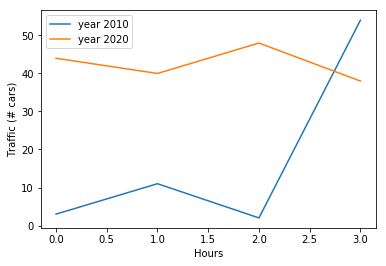

In [2]:
plt.plot([3, 11, 2, 54], label= 'year 2010')
plt.plot([44, 40, 48, 38], label = 'year 2020')
plt.xlabel('Hours')
plt.ylabel('Traffic (# cars)')
plt.legend()
plt.show()

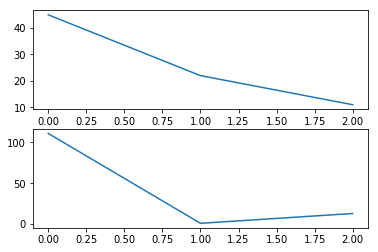

In [3]:
plt.figure()
plt.subplot(211)
plt.plot([45, 22, 11])
plt.subplot(212)
plt.plot([111, 1, 13])
plt.show()

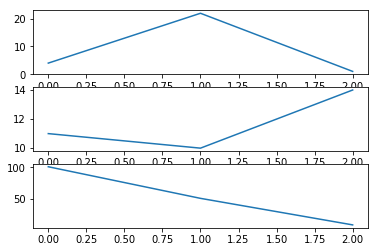

In [4]:
plt.figure()
plt.subplot(311)
plt.plot([4, 22, 1])
plt.subplot(312)
plt.plot([11, 10, 14])
plt.subplot(313)
plt.plot([101, 51, 9])
plt.show()

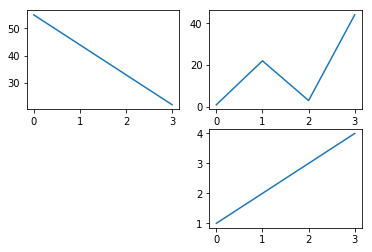

In [5]:
plt.figure()
plt.subplot(221)
plt.plot([55, 44, 33, 22])
plt.subplot(222)
plt.plot([1, 22, 3, 44])
plt.subplot(224)
plt.plot([1, 2, 3, 4])
plt.show()

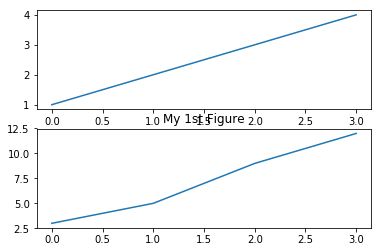

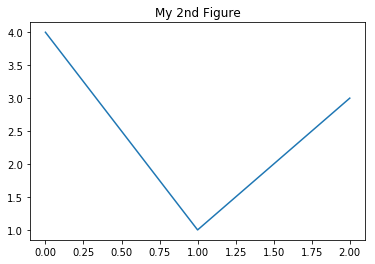

In [6]:
plt.figure(1)
plt.subplot(211)
plt.plot([1,2,3,4])
plt.subplot(212)
plt.plot([3, 5, 9, 12])
plt.title('My 1st Figure')

plt.figure(2)
plt.plot([4, 1, 3])
plt.title('My 2nd Figure')
plt.show()

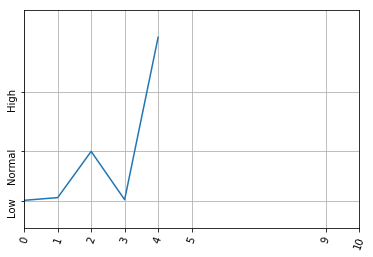

In [7]:
plt.figure()
plt.plot([0,1,2,3,4], [.2, 50, 900, 12, 3000])
plt.ylim(-500, 3500)
plt.xlim(0, 10)
plt.xticks([0,1,2,3,4,5,9,10], rotation = 70)
plt.yticks([-10, 900, 2000], ['Low', 'Normal', 'High'], rotation = 'vertical')
plt.grid()
plt.show()

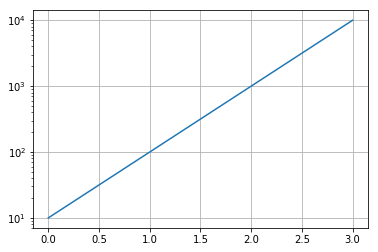

In [8]:
plt.plot([10, 100, 1000, 10000])
plt.yscale('log')
plt.grid()
plt.show()

# Part 2 - Pandas and MatplotLib

As in [ADM Introductory Laboratory](../lab-intro/ADM%20Lab%201%20-%20Intro.ipynb) we work with the data provided by the [Open Data portal of the City of Rome](http://dati.comune.roma.it/). We use the dataset related to registered hosting structures, that is, hotels, hostels, B&B, etc., that were active during January 2019. For information on how to import the data from these datasets into a data structure that will support further studies, check out the [ADM Introductory Laboratory](../lab-intro/ADM%20Lab%201%20-%20Intro.ipynb).

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot

In [10]:
dataset = pd.read_csv("../data/opendata_suar_gennaio.csv",
                     sep=',', delimiter = None,
                     header='infer', names=None,
                     index_col = None, usecols = None,
                     encoding = "ISO-8859-1")

In [11]:
dataset.columns

Index(['Insegna', 'Classificazione', 'Indirizzo', 'Municipio', 'Tipologia',
       'Singole', 'Doppie', 'Triple', 'Quadruple', 'Quintuple', 'Sestuple',
       'Unitaâ Abitative', 'Posti Letto Unitaâ Abitative', 'Sito Web',
       'Email', 'Telefono', 'Fax', 'Cellulare', 'Contatto Facebook',
       'Contatto Twitter', 'Contatto Instagram', 'Contatto Altro Social',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [12]:
dataset = dataset.drop(columns=['Unitaâ Abitative', 'Posti Letto Unitaâ Abitative', 'Sito Web',
                                'Email', 'Telefono', 'Fax', 'Cellulare', 'Contatto Facebook',
                                'Contatto Twitter', 'Contatto Instagram', 'Contatto Altro Social', 
                                'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'])

In [13]:
dataset['Address'] = dataset['Indirizzo'] + " " + dataset['Municipio']

In [14]:
dataset = dataset.drop(columns=['Indirizzo', 'Municipio'])

In [15]:
dataset.head()

,Insegna,Classificazione,Tipologia,Singole,Doppie,Triple,Quadruple,Quintuple,Sestuple,Address
0,"Casa e Appartamento per Vacanze ""Trastevere_ho...",Categoria 2,Mun. XII,Casa Vacanze NON impr (Appartamento),1,NaN,NaN,NaN,NaN,VIA FEDERICO ROSAZZA 52
1,"Casa e Appartamento per Vacanze ""VIVES 63""",Categoria 1,Mun. XII,Casa Vacanze NON impr (Appartamento),NaN,1,NaN,NaN,NaN,VIA DI MONTE VERDE 63
2,"CASA E APPARTAMENTO PER VACANZE ""LA CASA DI FA...",Categoria 2,Mun. I,Casa Vacanze NON impr (Appartamento),1,NaN,NaN,NaN,NaN,VIA AUGUSTO AUBRY 1
3,casa e appartamento per vacanze Valentina's house,Categoria 2,Mun. I,Casa Vacanze NON impr (Appartamento),NaN,2,NaN,NaN,NaN,VIALE GIULIO CESARE 51/A
4,OLD CITY TESTACCIO CASA E APPARTAMENTO PER VAC...,Categoria 2,Mun. I,Casa Vacanze NON impr (Appartamento),1,1,NaN,NaN,NaN,VIA ORAZIO ANTINORI 2


In [16]:
dataset.shape

(12137, 10)

In [17]:
dataset['Doppie'].isnull().sum()

2518

In [18]:
dataset['Triple'].isnull().sum()

1135

In [19]:
dataset['Quadruple'].isnull().sum()

3222

In [20]:
cols = ['Singole', 'Doppie', 'Triple', 'Quadruple', 'Quintuple', 'Sestuple']

In [21]:
for col in cols:
    print(col, dataset[col].isnull().sum())

Singole 0
Doppie 2518
Triple 1135
Quadruple 3222
Quintuple 3578
Sestuple 3660


In [22]:
for col in cols:
    dataset[col] = dataset[col].fillna(0)
    print(col, dataset[col].isnull().sum())

Singole 0
Doppie 0
Triple 0
Quadruple 0
Quintuple 0
Sestuple 0


In [23]:
dataset['Doppie'].sum()

TypeError: must be str, not int

In [24]:
dataset['Doppie'].dtype

dtype('O')

In [25]:
new_series = pd.to_numeric(dataset['Doppie'])

ValueError: Unable to parse string "Casa Vacanze NON impr (Appartamento)" at position 1059

In [26]:
dataset['Doppie'][1059]

'Casa Vacanze NON impr (Appartamento)'

In [27]:
dataset['Doppie'] = pd.to_numeric(dataset['Doppie'], errors='coerce')

In [28]:
dataset['Doppie'][1059]

nan

In [29]:
dataset['Doppie'].sum()

16404.0

In [30]:
dataset['Doppie'].max()

415.0

In [31]:
dataset['Doppie'].idxmax()

11237

In [32]:
dataset.loc[11237]

Insegna             ERGIFE  PALACE
Classificazione           4 Stelle
Tipologia               Mun. XIII 
Singole                    Albergo
Doppie                         415
Triple                         289
Quadruple                        0
Quintuple                        0
Sestuple                         0
Address            VIA AURELIA 619
Name: 11237, dtype: object

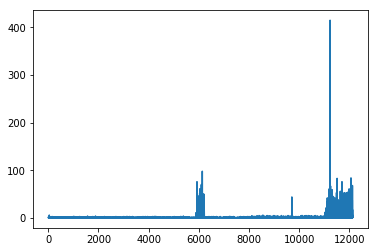

In [33]:
dataset['Doppie'].plot()

In [34]:
cols

['Singole', 'Doppie', 'Triple', 'Quadruple', 'Quintuple', 'Sestuple']

In [35]:
for col in cols:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

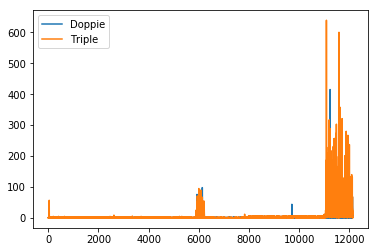

In [36]:
dataset[  ['Doppie', 'Triple']  ].plot()

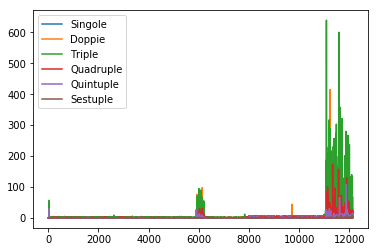

In [37]:
dataset [ cols ].plot()

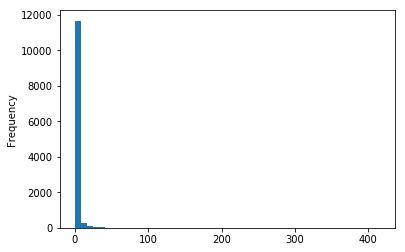

In [38]:
dataset['Doppie'].plot.hist(bins=50)

In [39]:
tipo_set = dataset.groupby(['Tipologia']).sum()

In [40]:
tipo_set

,Singole,Doppie,Triple,Quadruple,Quintuple,Sestuple
Tipologia,,,,,,
1/D,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,2.0,1.0,0.0
16,0.0,0.0,1.0,0.0,0.0,0.0
171,0.0,0.0,0.0,2.0,0.0,0.0
21,0.0,0.0,4.0,0.0,0.0,0.0
3,0.0,0.0,0.0,157.0,4.0,0.0
44,0.0,0.0,0.0,2.0,0.0,1.0
45,0.0,0.0,1.0,1.0,0.0,0.0
49,0.0,0.0,0.0,1.0,0.0,0.0


In [41]:
tipo_set.index[-1:]

Index(['VIA DI COLLE PIZZUTO'], dtype='object', name='Tipologia')

In [42]:
values = tipo_set.index[0:14]
values = values.append(tipo_set.index[-1:])

In [43]:
values

Index([' 1/D', '1', '16', '171', '21', '3', '44', '45', '49', '56', '70', '71',
       '76', 'Categoria 2', 'VIA DI COLLE PIZZUTO'],
      dtype='object', name='Tipologia')

In [44]:
for col in values:
    dataset = dataset[~ dataset['Tipologia'].str.contains(col) ]

In [45]:
dataset.shape

(12121, 10)

In [46]:
tipo_set = dataset.groupby(['Tipologia']).sum()

In [47]:
tipo_set

,Singole,Doppie,Triple,Quadruple,Quintuple,Sestuple
Tipologia,,,,,,
Mun. I,0.0,8560.0,29234.0,6535.0,1679.0,174.0
Mun. II,0.0,1459.0,3801.0,599.0,133.0,7.0
Mun. III,0.0,323.0,691.0,117.0,17.0,2.0
Mun. IV,0.0,303.0,646.0,315.0,19.0,5.0
Mun. IX,0.0,298.0,2722.0,291.0,41.0,2.0
Mun. V,0.0,270.0,1070.0,114.0,33.0,0.0
Mun. VI,0.0,200.0,926.0,115.0,76.0,0.0
Mun. VII,0.0,687.0,2178.0,301.0,33.0,1.0
Mun. VIII,0.0,258.0,1056.0,175.0,28.0,0.0


In [48]:
for col in cols:        
    print(cols.index(col) + 1, col, dataset[col].sum())

1 Singole 0.0
2 Doppie 16360.0
3 Triple 54641.0
4 Quadruple 10165.0
5 Quintuple 2338.0
6 Sestuple 216.0


In [49]:
import matplotlib.pyplot

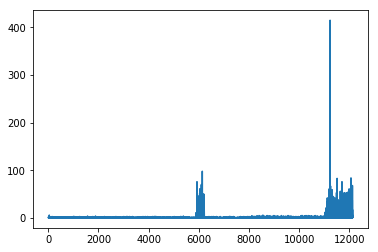

In [50]:
dataset['Doppie'].plot()

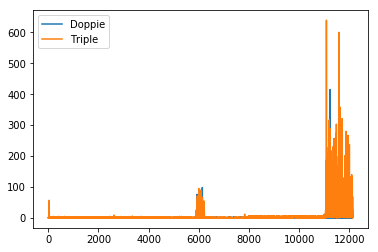

In [51]:
dataset[['Doppie', 'Triple']].plot()

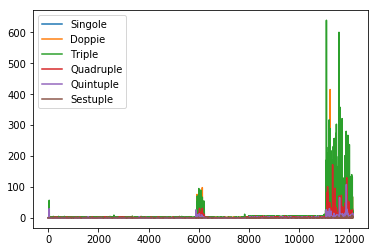

In [52]:
dataset[cols].plot()

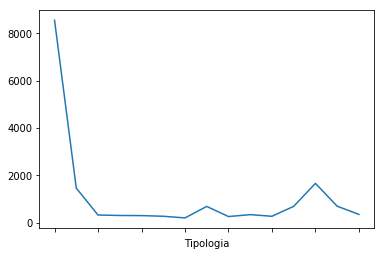

In [53]:
tipo_set['Doppie'].plot()

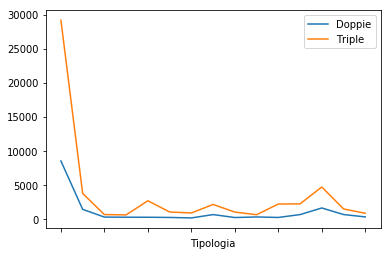

In [54]:
tipo_set[['Doppie', 'Triple']].plot()

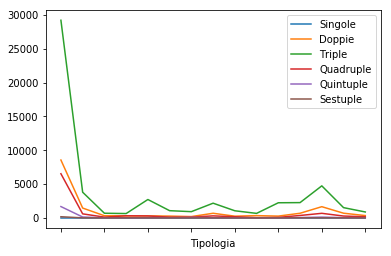

In [55]:
tipo_set[cols].plot()